In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.colors import LogNorm
from scipy.ndimage import zoom
from scipy.interpolate import interp2d

In [2]:
from Map import lyoptimalcube,lyvelocitymap,lydispersionmap,lysnrmap,heiioptimalcube,heiivelocitymap,heiidispersionmap,heiisnrmap,civoptimalcube,civvelocitymap,civsnrmap,civdispersionmap

/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:179: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/KCWI_script/Map.py:78: RuntimeWarning: invalid value encountered in greater
  lydispersionmap[lydispersionmap>1000]=np.nan
/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/KCWI_script/Map.py:79: RuntimeWarning: invalid value encountered in less
  lydispersionmap[lydispersionmap<200]=np.nan
/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/usr/local/lib/python3.7/sit

In [3]:
ly_f=lyoptimalcube.optimal_img.sum()*1e-17*u.erg/(u.s*(u.cm**2))
D=18528.4*u.Mpc
L_ly=ly_f*4*np.pi*D**2
L_ly.to(u.erg/u.s)

<Quantity 1.6876302e+44 erg / s>

In [4]:
heii_f=heiioptimalcube.optimal_img.sum()*1e-17*u.erg/(u.s*(u.cm**2))
D=18528.4*u.Mpc
L_heii=heii_f*4*np.pi*D**2
L_heii.to(u.erg/u.s)

<Quantity 5.4867013e+42 erg / s>

In [5]:
civ_f=civoptimalcube.optimal_img.sum()*1e-17*u.erg/(u.s*(u.cm**2))
D=18528.4*u.Mpc
L_civ=civ_f*4*np.pi*D**2
L_civ.to(u.erg/u.s)

<Quantity 6.97911349e+42 erg / s>

In [6]:
def interpolate1(x,y,img,n_inter=[5,17]):
    img_inter=zoom(img,n_inter)
    x_inter=zoom(x,n_inter[0])
    y_inter=zoom(y,n_inter[1])
    
    return img_inter,x_inter,y_inter
def interpolate2(x,y,img,n=500):
    
    interfunc=interp2d(y,x,img,kind='linear')
    x_new=np.linspace(x.min(),x.max(),n)
    y_new=np.linspace(y.min(),y.max(),n)
    
    img_inter=interfunc(x_new,y_new)
    
    return img_inter,x_new,y_new

In [7]:
x=heiioptimalcube.ra.to(u.arcsec).value
y=heiioptimalcube.dec.to(u.arcsec).value

### Ly$\alpha$

In [8]:
lyvelocitymap[np.isnan(lyvelocitymap)]=0
lydispersionmap[np.isnan(lydispersionmap)]=0
background=np.random.normal(0,0.015,lyoptimalcube.optimal_img.shape)


lyimg,xinter,yinter=interpolate1(x,y,lyoptimalcube.optimal_img)
lyv,_,_=interpolate1(x,y,lyvelocitymap)
lyd,_,_=interpolate1(x,y,lydispersionmap)
lysnr,_,_=interpolate1(x,y,lysnrmap)
background,_,_=interpolate1(x,y,background)

lyimg[lysnr<7]=0
lyv[lysnr<7]=np.nan
lyd[lysnr<7]=np.nan
lyimg[250:300,40:60]=0
lyimg[:100,40:100]=0
lyimg[:50,150:200]=0
np.savetxt('/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/ly_flux.txt',lyimg)
np.savetxt('/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/x_flux.txt',xinter)
np.savetxt('/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/y_flux.txt',yinter)
lyv[lyimg<1e-8]=np.nan
lyd[lyimg<1e-8]=np.nan
background[~(lyimg<1e-8)]=0
lysnr[lyimg<1e-8]=0
lyimg+=background

### HeII

In [9]:
heiivelocitymap[np.isnan(heiivelocitymap)]=0
heiidispersionmap[np.isnan(heiidispersionmap)]=0
background=np.random.normal(0,0.009,heiioptimalcube.optimal_img.shape)


heiiimg,_,_=interpolate1(x,y,heiioptimalcube.optimal_img)
heiiv,_,_=interpolate1(x,y,heiivelocitymap)
heiid,_,_=interpolate1(x,y,heiidispersionmap)
heiisnr,_,_=interpolate1(x,y,heiisnrmap)
background,_,_=interpolate1(x,y,background)

heiiimg[heiisnr<2]=0
heiiv[heiisnr<2]=np.nan
heiid[heiisnr<2]=np.nan
heiiimg[220:250,160:220]=0
heiiimg[90:105,220:310]=0
heiiimg[140:160,290:315]=0
np.savetxt('/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/heii_flux.txt',heiiimg)
heiiv[heiiimg<1e-8]=np.nan
heiid[heiiimg<1e-8]=np.nan
heiisnr[heiiimg<1e-8]=0
background[~(heiiimg<1e-8)]=0
heiiimg+=background

### CIV

In [10]:
civvelocitymap[np.isnan(civvelocitymap)]=0
civdispersionmap[np.isnan(civdispersionmap)]=0
civdispersionmap[civdispersionmap>1000]=0
background=np.random.normal(0,0.007,civoptimalcube.optimal_img.shape)

civimg,_,_=interpolate1(x,y,civoptimalcube.optimal_img)
civv,_,_=interpolate1(x,y,civvelocitymap)
civd,_,_=interpolate1(x,y,civdispersionmap)
civsnr,_,_=interpolate1(x,y,civsnrmap)
background,_,_=interpolate1(x,y,background)

civimg[civsnr<2]=0
civimg[100:130,130:205]=0
civimg[218:250,130:207]=0
civimg[:100,200:315]=0
np.savetxt('/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/civ_flux.txt',civimg)
civv[civimg<1e-8]=np.nan
civd[civimg<1e-8]=np.nan
civsnr[civimg<1e-8]=0
background[~(civimg<1e-8)]=0
civimg+=background

In [11]:
origin_world=np.array([220.3520886,40.05269183])
sources_list=np.array([[220.3517351,40.05269063],
                       [220.3521004,40.05267509],
                       [220.3519736,40.05221132],
                       [220.3520722,40.05297709],
                       
                       [220.3531717,40.05223288],
                       [220.3497255,40.05104434],
                       [220.3492992,40.05225575],
                       [220.3499296,40.05351636],
                       [220.3525,40.0545]])*u.deg
sources_list[:,0]=sources_list[:,0]-0.0002*u.deg
source_name=['G-2','G-3','G-4','G-6','G-5','G-1']
source_name_coor=np.array([[220.3520722,40.05297709],[220.3531717,40.05223288],
                           [220.3497255,40.05104434],[220.3492992,40.05225575],
                           [220.3499296,40.05351636],[220.3525,40.0545]])*u.deg
delta_sources=(sources_list-origin_world*u.deg).to(u.arcsec).value
delta_source_name_coor=(source_name_coor-origin_world*u.deg).to(u.arcsec).value

In [12]:
IMG=[lyimg,heiiimg,civimg]
CONT=[lysnr,heiisnr,civsnr]
Velo=[lyv,heiiv,civv]
Disp=[lyd,heiid,civd]
Plot=[IMG,Velo,Disp]
CMAP=[['hot','coolwarm','coolwarm']]*3
LEVELS=[[7],[2],[2]]
Vmax=[[4,600,600],[0.4,500,500],[0.4,500,500]]
Vmin=[[0,-600,0],[0,-500,0],[0,-500,0]]
title1=[r'Ly$\alpha$','HeII','CIV']
title2=['Velocity','Dispersion']
cabarlabel=[r'Flux [10$^{-17}$ erg s$^{-1}$ cm$^{-2}$] ', r'V [km s$^{-1}$]',r'V$_{\rm \sigma}$ [km s$^{-1}$]']

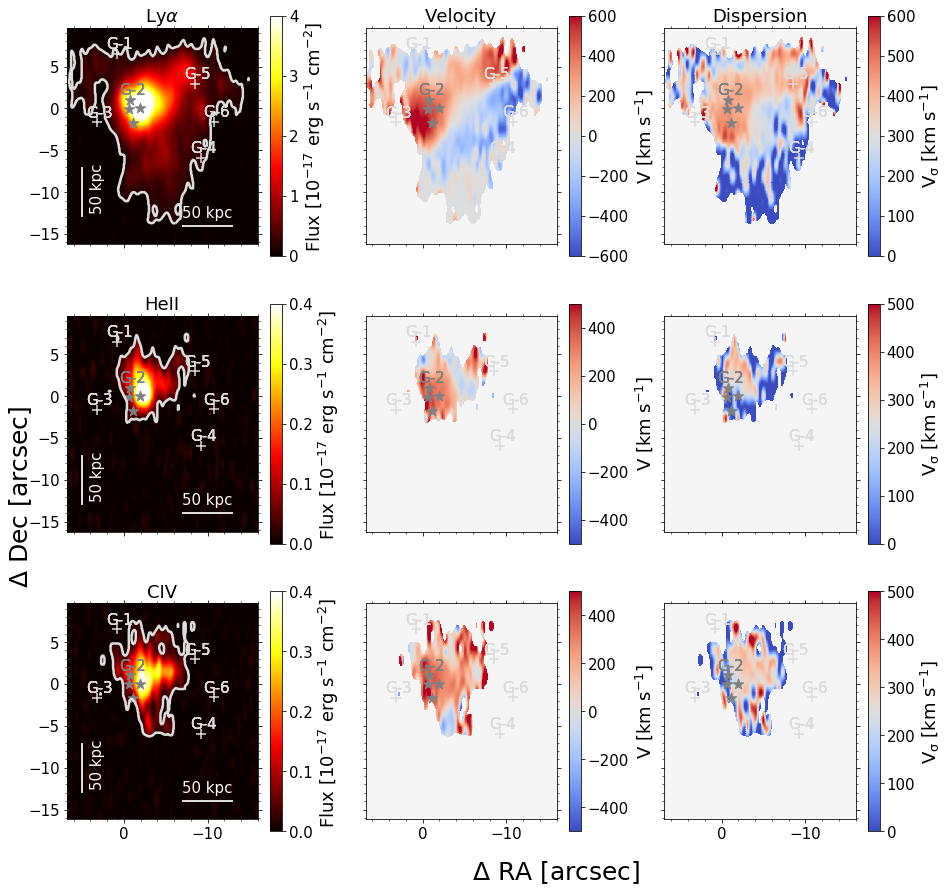

In [15]:
fig,ax=plt.subplots(3,3,sharex=True,sharey=True)
norm=LogNorm()
for i in range(3):
    for j in range(3):
        img=ax[i,j].pcolormesh(xinter,yinter,Plot[j][i].T,cmap=CMAP[i][j],vmax=Vmax[i][j],vmin=Vmin[i][j])
        if j==0:
            ax[i,j].set_title(title1[i],fontsize=18)
            ax[i,j].contour(xinter,yinter,CONT[i].T,colors='gainsboro',levels=LEVELS[i],linewidths=2.5)
            ax[i,j].vlines(x=5,ymin=-13,ymax=-13+6.,lw=2,color='gainsboro')
            ax[i,j].text(4,-8,'50 kpc',color='snow',fontsize=15,rotation=90)
            ax[i,j].hlines(y=-14,xmin=-7,xmax=-13.,lw=2,color='gainsboro')
            ax[i,j].text(-7,-13,'50 kpc',color='snow',fontsize=15)
        for k in range(4):
            ax[i,j].scatter(delta_sources[k,0],delta_sources[k,1],marker='*',color='gray',s=120)
        for k in range(4,delta_sources.shape[0]):
            ax[i,j].scatter(delta_sources[k,0],delta_sources[k,1],marker='+',color='gainsboro',s=120)
            for k in range(1,len(source_name)):
                ax[i,j].annotate(source_name[k],xy=(delta_source_name_coor[k,0],delta_source_name_coor[k,1]),
                                 xytext=(-5,5),textcoords="offset points",color='gainsboro',fontsize=15)
            ax[i,j].annotate(source_name[0],xy=(delta_source_name_coor[0,0],delta_source_name_coor[0,1]),
                                     xytext=(-5,5),textcoords="offset points",color='gray',fontsize=15)
        if (i==0)&(j>0):
            ax[i,j].set_title(title2[j-1],fontsize=18)
        cbar=plt.colorbar(img,ax=ax[i,j])
        cbar.ax.set_ylabel(cabarlabel[j],fontsize=18)
        cbar.ax.tick_params(labelsize=15)
        ax[i,j].set_facecolor('whitesmoke')
        ax[i,j].set_aspect('equal')
        ax[i,j].tick_params(axis='both', which='both',top=True,right=True)
        ax[i,j].minorticks_on()
        ax[i,j].invert_xaxis()
        ax[i,j].tick_params(axis='both', which='major', labelsize=15)
        ax[i,j].tick_params(axis='both', which='minor', labelsize=10)
fig.text(0.07,0.5,r'$\Delta$ Dec [arcsec]',rotation='vertical',fontsize=25)
fig.text(0.5,0.08,r'$\Delta$ RA [arcsec]',fontsize=25)
plt.rcParams['figure.figsize'] = [15, 15]
plt.subplots_adjust(wspace=.25)#hspace=0.2
# plt.show( )
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.savefig(savdic+'map.png',dpi=300)